# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [2]:
# YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
import scipy.stats as stats

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [3]:
# YOUR CODE HERE
adultDataSet_filename = os.path.join(os.getcwd(), "data", "adultData.csv")
df = pd.read_csv(adultDataSet_filename)# YOUR CODE HERE
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32399 non-null  float64
 1   workclass       30725 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   32561 non-null  int64  
 5   marital-status  32561 non-null  object 
 6   occupation      30718 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex_selfID      32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32236 non-null  float64
 13  native-country  31978 non-null  object 
 14  income_binary   32561 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 3.7+ MB


**Missing values**

In [5]:
# YOUR CODE HERE
df.isnull().sum()

age                162
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week     325
native-country     583
income_binary        0
dtype: int64

In [6]:
# remove all null values in `age` entries
#df = df.dropna(axis = 0, how = 'any')
# replace other null vlaues with their mode
for col in df.columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [7]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex_selfID        0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income_binary     0
dtype: int64

**Outliers / Winsorization**

Text(0, 0.5, 'Count')

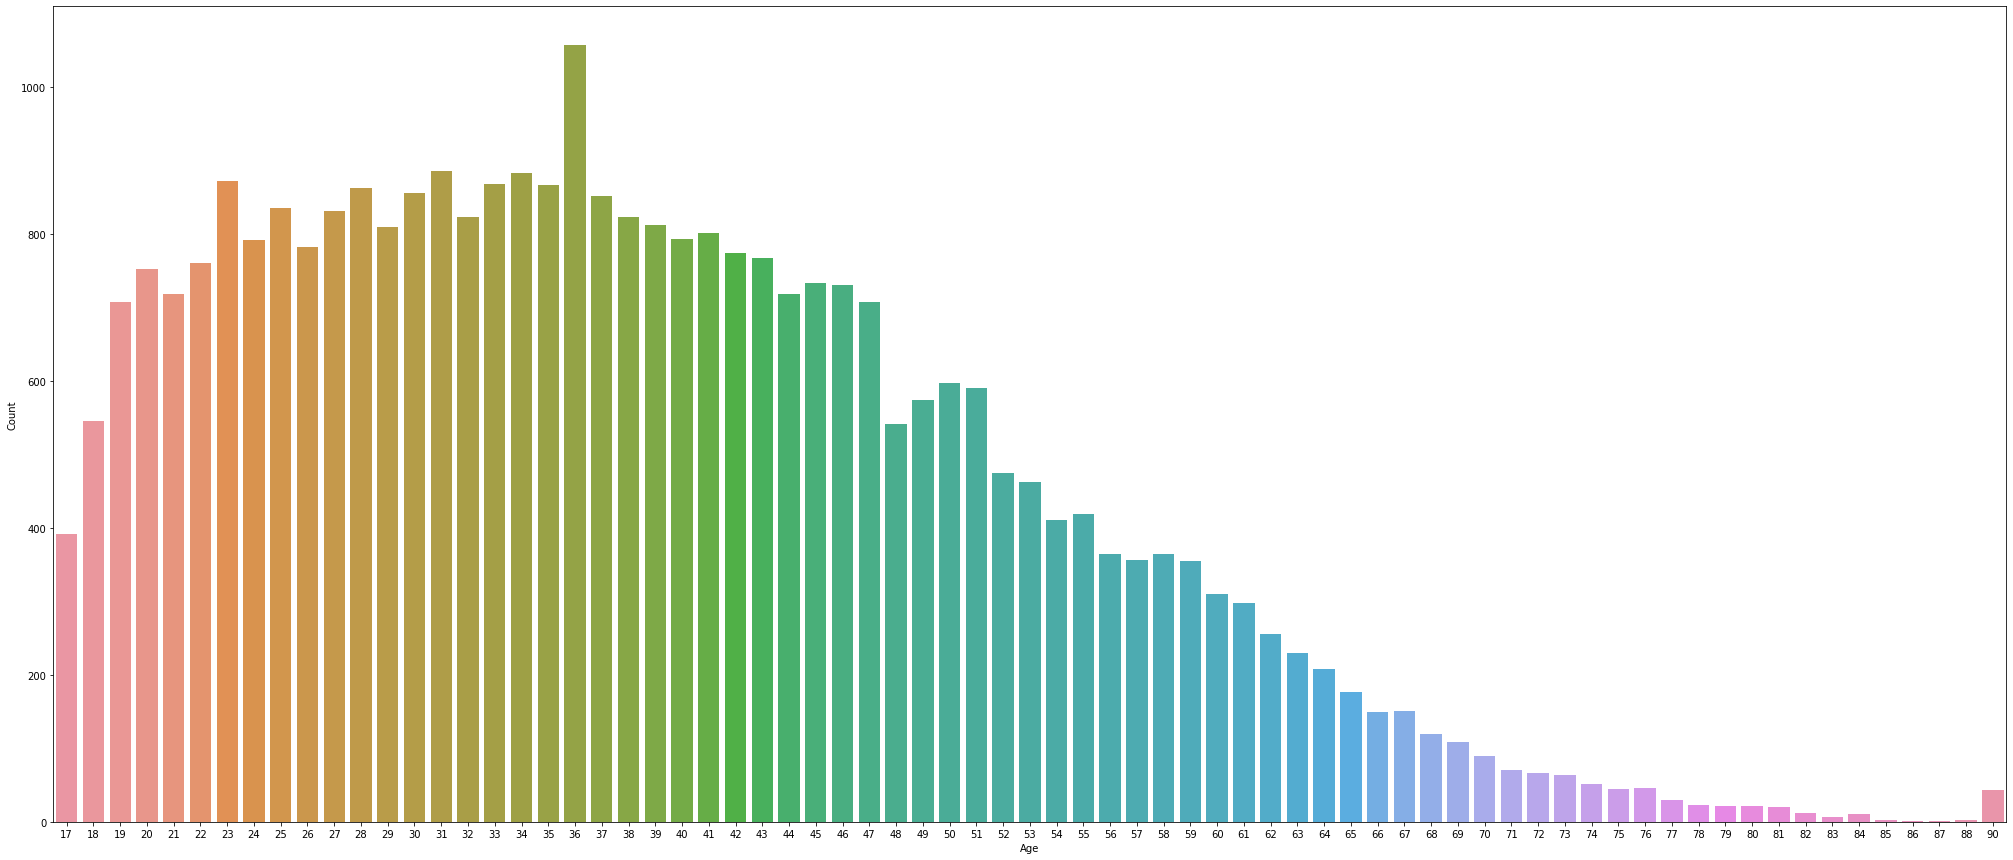

In [8]:
# 'age' feature
df['age'] = df['age'].astype(int)
plt.figure(figsize=(35, 15))
sns.barplot(x=df['age'].value_counts().index, y=df['age'].value_counts().values)
plt.xlabel('Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

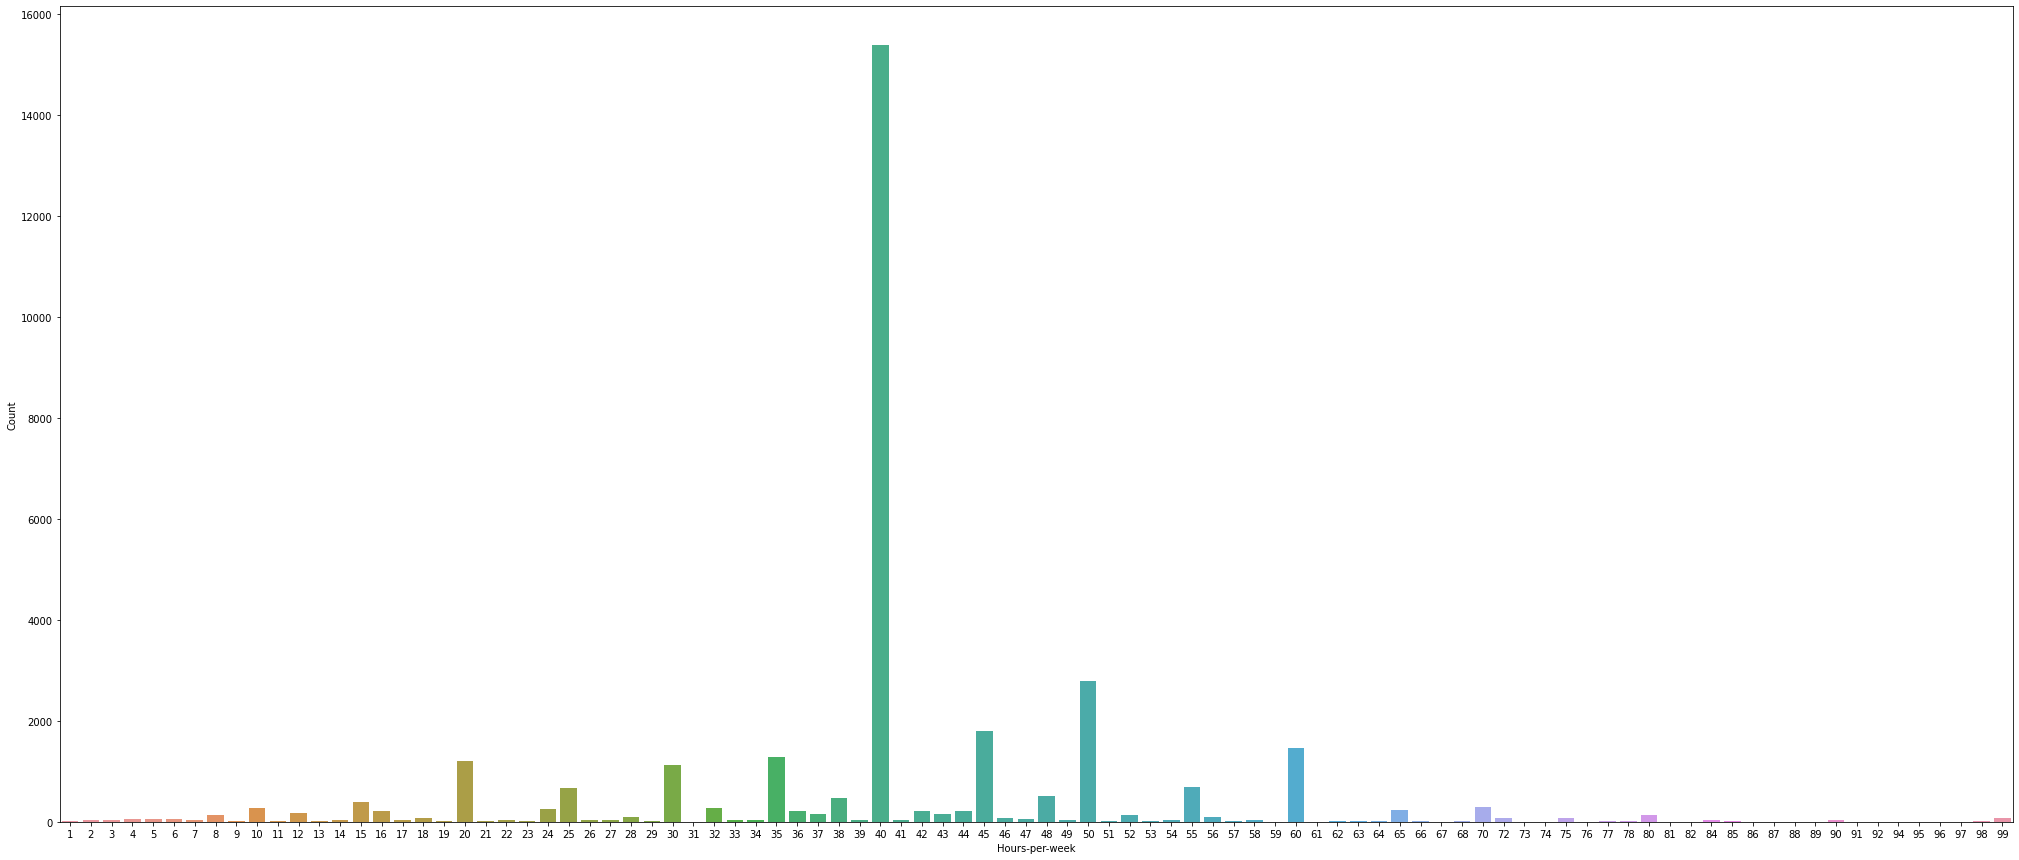

In [9]:
# 'hours-per-week' feature
df['hours-per-week'] = df['hours-per-week'].astype(int)
plt.figure(figsize=(35, 15))
sns.barplot(x=df['hours-per-week'].value_counts().index, y=df['hours-per-week'].value_counts().values)
plt.xlabel('Hours-per-week')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

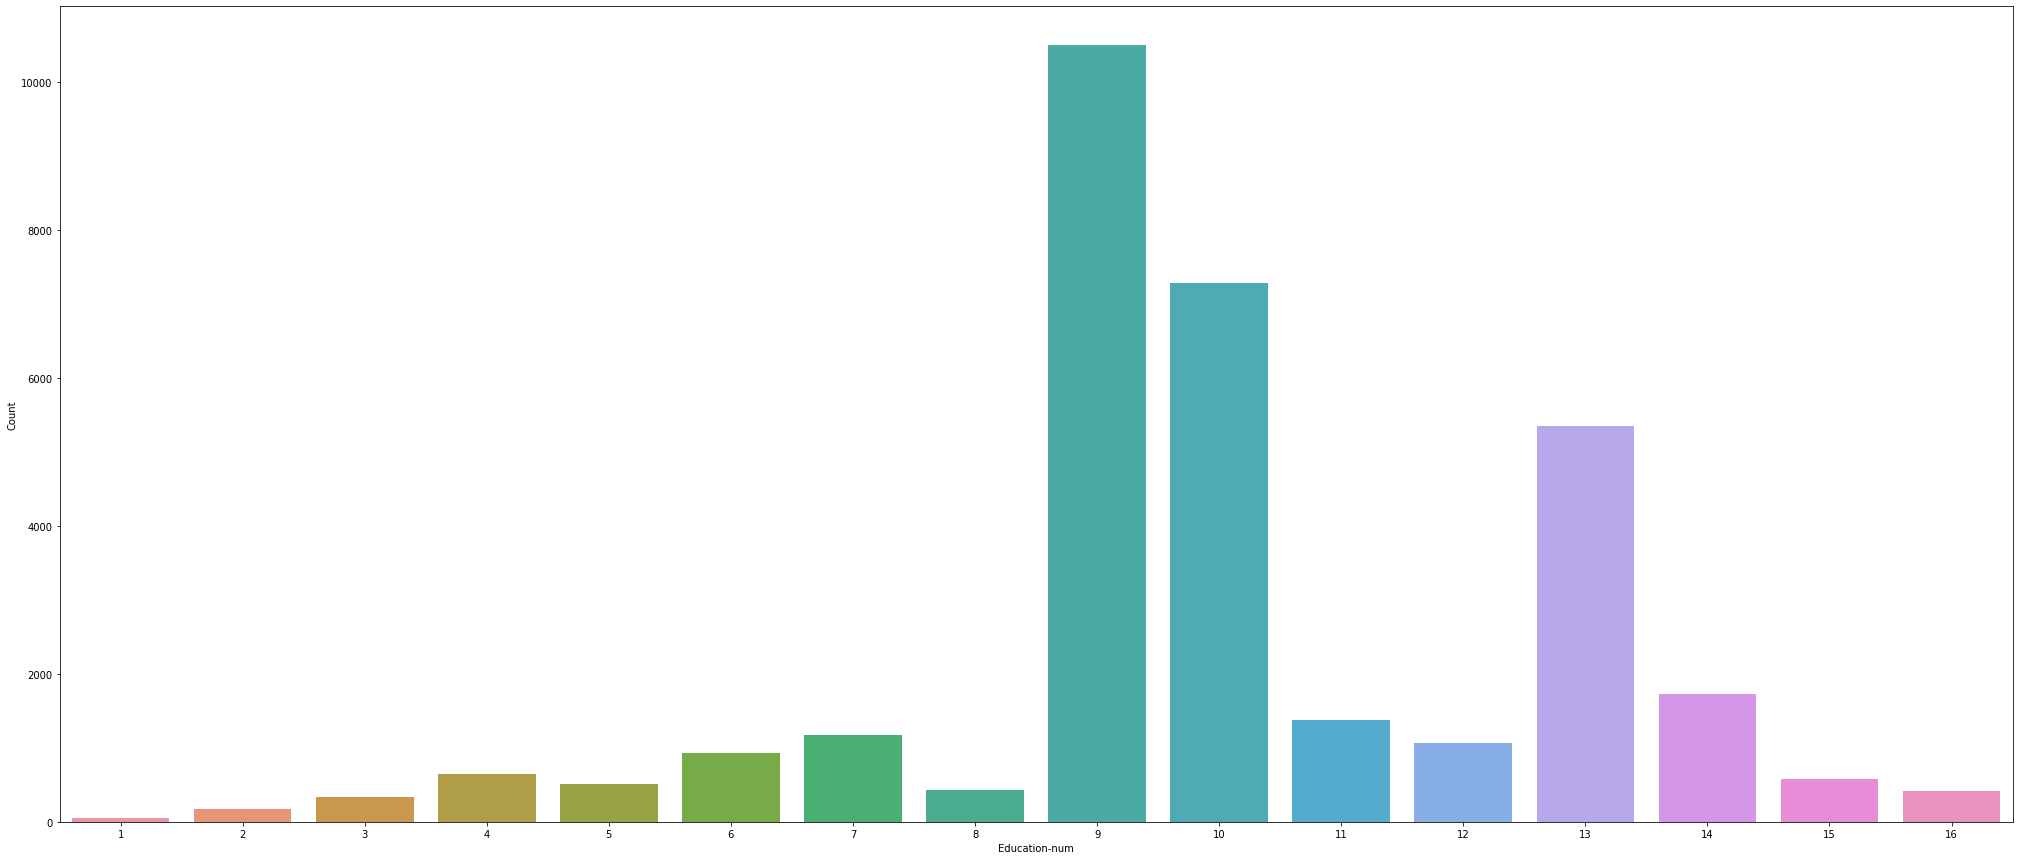

In [10]:
# 'education-num' feature
plt.figure(figsize=(35, 15))
sns.barplot(x=df['education-num'].value_counts().index, y=df['education-num'].value_counts().values)
plt.xlabel('Education-num')
plt.ylabel('Count')

In [11]:
# some winsorization 
df['age'] = stats.mstats.winsorize(df['age'], limits=[0.01, 0.01])
df['hours-per-week'] = stats.mstats.winsorize(df['hours-per-week'], limits=[0.01, 0.01])
df['education-num'] = stats.mstats.winsorize(df['education-num'], limits=[0.01, 0.01])

**Categorical features**

In [12]:
for col in df.columns:
    if df[col].dtypes == 'object':
        print(col)
        print(df[col].unique())
        print('\n')

workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']


education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']


marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']


occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']


relationship
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']


race
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Inuit' 'Other']


sex_selfID
['Non-Female' 'Female']


native-country
['United-States' 'Cuba' 'Jamaica' 'India' 'Mexico' 'South' 'Puerto-Rico'
 'Honduras' 'Engl

In [13]:
to_encode = [col for col in df.columns if df[col].dtypes == 'object']
to_encode.remove('income_binary')
to_encode.remove('education')
to_encode

['workclass',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex_selfID',
 'native-country']

**One-Hot Encoding**

In [14]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown="error", sparse=False)
df_enc = pd.DataFrame(encoder.fit_transform(df[to_encode]))
df_enc.columns = encoder.get_feature_names(to_encode)

In [15]:
df_enc.sample(5)

,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Divorced,marital-status_Married-AF-spouse,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
6134,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3322,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26459,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25897,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16467,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [16]:
df = df.join(df_enc)
df.drop(to_encode ,axis=1, inplace=True)
df.drop('education',axis=1, inplace=True) #education-num will use in training model

In [17]:
df.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income_binary', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-sup

In [18]:
df.isnull().sum()

age                               0
fnlwgt                            0
education-num                     0
capital-gain                      0
capital-loss                      0
                                 ..
native-country_Thailand           0
native-country_Trinadad&Tobago    0
native-country_United-States      0
native-country_Vietnam            0
native-country_Yugoslavia         0
Length: 90, dtype: int64

In [19]:
for col in df.columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [20]:
df.isnull().sum()

age                               0
fnlwgt                            0
education-num                     0
capital-gain                      0
capital-loss                      0
                                 ..
native-country_Thailand           0
native-country_Trinadad&Tobago    0
native-country_United-States      0
native-country_Vietnam            0
native-country_Yugoslavia         0
Length: 90, dtype: int64

**Class Imbalance**

In [21]:
df['income_binary'].value_counts()

<=50K    24720
>50K      7841
Name: income_binary, dtype: int64

## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

**Change target feature `income_binary` to numerical values of `0` and `1`**

In [22]:
df['income_binary'].replace('<=50k', 0, inplace = True)
df['income_binary'].replace('>50k', 1, inplace = True)

**Spliting Data**

In [23]:
X = df.drop('income_binary', axis = 1)
y = df['income_binary']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 1234)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(22792, 89)
(9769, 89)
(22792,)
(9769,)


In [26]:
lr_model = LogisticRegression(max_iter = 1000)
lr_model.fit(X_train, y_train)
probability_predictions = lr_model.predict_proba(X_test)
l_loss = log_loss(y_test, probability_predictions)
class_label_predictions = lr_model.predict(X_test)
acc_score = accuracy_score(y_test, class_label_predictions)

In [27]:
print('Log loss: ' + str(l_loss))
print('Accuracy: ' + str(acc_score))

Log loss: 0.41027919007423874
Accuracy: 0.8014126317944519


**Model Improvement**

**Grid Search**

In [28]:
from sklearn.svm import l1_min_c

cs = l1_min_c(X_train, y_train, loss="log") * np.logspace(0, 7, 16)
param_grid = dict(C = list(cs))
param_grid

{'C': [8.956872871640158e-10,
  2.6231497051568184e-09,
  7.682273126205808e-09,
  2.2498647435029155e-08,
  6.589054152201768e-08,
  1.9296997628867058e-07,
  5.651404721936754e-07,
  1.6550955721397478e-06,
  4.847186651282369e-06,
  1.4195686840002117e-05,
  4.1574121105094207e-05,
  0.00012175582380350553,
  0.0003565795315936038,
  0.0010442947070582209,
  0.003058368017692963,
  0.008956872871640157]}

In [29]:
print('Running Grid Search...')
grid = GridSearchCV(lr_model, param_grid, cv =5)
grid_search = grid.fit(X_train, y_train)
print('Done')

Running Grid Search...
Done


In [30]:
best_c = grid_search.best_estimator_.C
best_c

0.003058368017692963

In [31]:
lr_best = LogisticRegression(max_iter = 1000, C = best_c)
lr_best.fit(X_train, y_train)
probability_predictions = lr_best.predict_proba(X_test)
l_loss = log_loss(y_test, probability_predictions)
class_label_predictions = lr_best.predict(X_test)
acc_score = accuracy_score(y_test, class_label_predictions)

In [32]:
print('Log loss: ' + str(l_loss))
print('Accuracy: ' + str(acc_score))

Log loss: 0.5092543596516599
Accuracy: 0.8012079025488791


**Changing hyperparameter `C` in logistic regression doesn't seem to affect the model performance that much, with no noticeable improvement in accuracy, but log loss seems to increase from ~0.4 to 0.5. Therefore, the original model might be better in predicting.**

**Variety Models**

**K-Nearest Neighbors**

In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)
class_label_predictions = knn_model.predict(X_test)
acc_score = accuracy_score(y_test, class_label_predictions) 
probability_predictions = knn_model.predict_proba(X_test)
l_loss = log_loss(y_test, probability_predictions)

In [ ]:
print('Log loss: ' + str(l_loss))
print('Accuracy: ' + str(acc_score))

In [ ]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [ ]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 31)
knn_model.fit(X_train,y_train)
class_label_predictions = knn_model.predict(X_test)
acc_score = accuracy_score(y_test, class_label_predictions) 
probability_predictions = knn_model.predict_proba(X_test)
l_loss = log_loss(y_test, probability_predictions)

In [ ]:
print('Log loss: ' + str(l_loss))
print('Accuracy: ' + str(acc_score))

**When `n_neighbors = 31`, the accuracy and the log loss is the best in between models.**

**Since my kernel kept dying when implementing KNN, I will skip this part...**

**Random Forest**

In [33]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
class_label_predictions = rf_model.predict(X_test)
acc_score = accuracy_score(y_test, class_label_predictions) 
probability_predictions = rf_model.predict_proba(X_test)
l_loss = log_loss(y_test, probability_predictions)

In [34]:
print('Log loss: ' + str(l_loss))
print('Accuracy: ' + str(acc_score))

Log loss: 0.4005824965575838
Accuracy: 0.8489098167673252


**Compare all the model, Random Forest model has the best accuracy and log loss in terms of performance, with the lowest log loss and the highest accuracy.**

**Fairness: Class Imbalance**

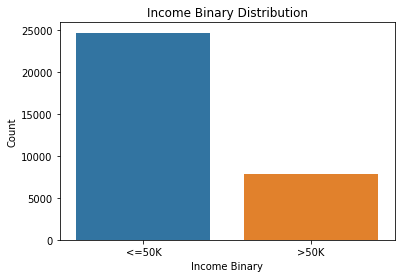

In [35]:
income = df['income_binary'].value_counts().reset_index()
income.columns = ['income_binary', 'count']
sns.barplot(x='income_binary', y='count', data=income)
plt.xlabel('Income Binary')
plt.ylabel('Count')
plt.title('Income Binary Distribution')
plt.show()

**Undersampling majority class**

In [49]:
count_minclass = df['income_binary'].value_counts()[1]
df_sample = pd.concat([df[df['income_binary'] == '<=50K'].sample(count_minclass),df[df['income_binary'] == '>50K']])

In [51]:
df_sample['income_binary'].value_counts()

>50K     7841
<=50K    7841
Name: income_binary, dtype: int64

In [52]:
X = df_sample.drop('income_binary', axis = 1)
y = df_sample['income_binary']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 1234)

In [54]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
class_label_predictions = rf_model.predict(X_test)
acc_score = accuracy_score(y_test, class_label_predictions) 
probability_predictions = rf_model.predict_proba(X_test)
l_loss = log_loss(y_test, probability_predictions)

In [55]:
print('Log loss: ' + str(l_loss))
print('Accuracy: ' + str(acc_score))

Log loss: 0.4296390716404017
Accuracy: 0.8208289054197662
